In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/environment-impact-of-food-production/Food_Production.csv


In [7]:
df = pd.read_csv('/kaggle/input/environment-impact-of-food-production/Food_Production.csv')

In [32]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

# **Data Preprocessing**

In [12]:
# Add a new column for tagging rows as 'Meat related' or 'Not animal related'
df['Tag'] = ['Not animal related' if i < 34 else 'Animal related' for i in range(len(df))]

# Display the first few rows to confirm the changes
df.head()


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Tag
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not animal related
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not animal related
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not animal related
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461,Not animal related
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480,Not animal related


# **Data Visualization**

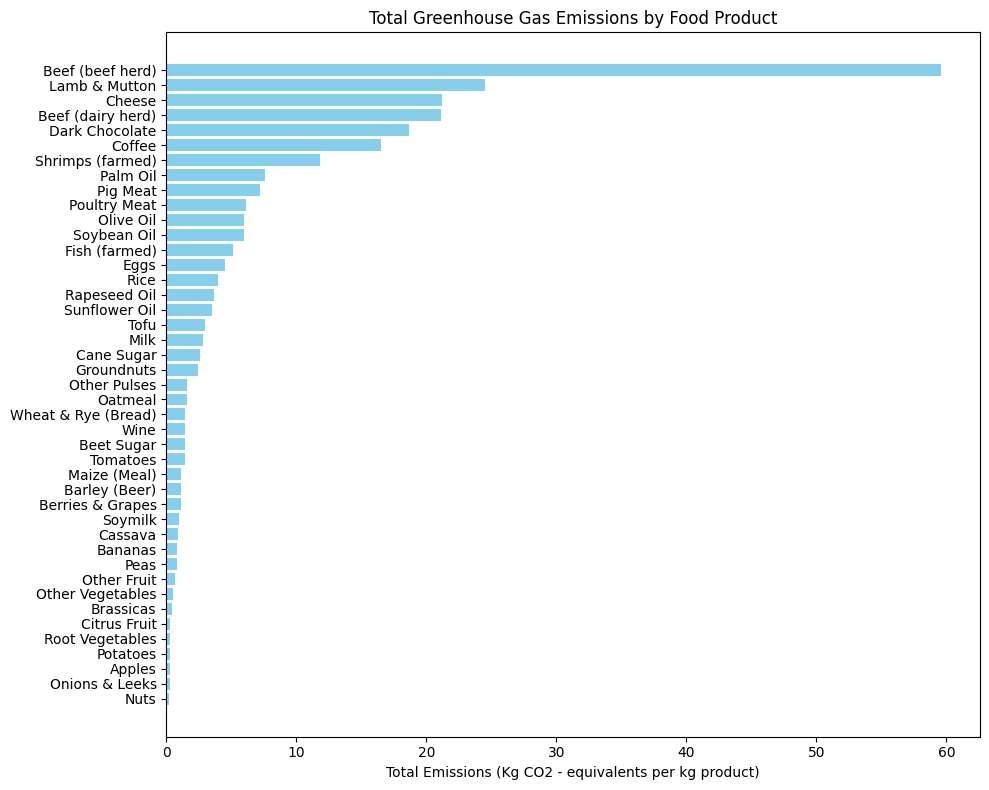

In [75]:

# Sort the data based on total emissions for better visualization
df_sorted = df.sort_values(by='Total_emissions', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(df_sorted['Food product'], df_sorted['Total_emissions'], color='skyblue')
plt.xlabel('Total Emissions (Kg CO2 - equivalents per kg product)')
plt.title('Total Greenhouse Gas Emissions by Food Product')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.tight_layout()
plt.show()


**Conclusion:**

The chart suggests that meat products, particularly beef (from beef herds) and lamb & mutton, have the highest greenhouse gas emissions per kilogram. Dairy products (cheese and beef from dairy herds) also rank high on the emissions scale. Plant-based foods, in contrast, generally exhibit much lower greenhouse gas emissions, with nuts, onions & leeks, and root vegetables being the categories with the least emissions. This pattern implies a significant environmental impact differential between animal-based and plant-based food products, with the former contributing more to greenhouse gas emissions. This information could be crucial for consumers and policymakers interested in reducing the environmental impact of diets and food production systems.

In [85]:
# Non Animal Related Data
df_non_animal = df[df['Tag'] == 'Not animal related']
df_non_animal.reset_index(drop = True, inplace = True)
df_non_animal.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Tag
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not animal related
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not animal related
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not animal related
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461,Not animal related
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480,Not animal related


In [86]:
# Animal Related Data
df_animal = df[df['Tag'] == 'Animal related']
df_animal.reset_index(drop = True, inplace = True)
df_animal.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Tag
0,Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,133.805861,...,2714.3,12.197802,16.869301,15.838828,43.24,21.904762,119805.2,60691.590680,43884.68864,Animal related
1,Lamb & Mutton,0.5,2.4,19.5,1.1,0.5,0.3,0.2,24.5,30.640379,...,1802.8,12.529968,19.850075,116.659306,369.81,184.812594,141925.0,70927.036480,44771.29338,Animal related
2,Pig Meat,1.5,2.9,1.7,0.3,0.3,0.3,0.2,7.2,31.958159,...,1795.8,5.150628,7.608158,7.263598,17.36,10.729295,66867.4,41327.194070,27977.99163,Animal related
3,Poultry Meat,2.5,1.8,0.7,0.4,0.3,0.2,0.2,6.1,26.324324,...,660.0,5.335135,5.698614,6.605405,12.22,7.055427,14177.9,8185.854503,7663.72973,Animal related
4,Milk,0.5,0.2,1.5,0.1,0.1,0.1,0.3,2.8,17.750000,...,628.2,5.250000,9.500000,14.916667,8.95,27.121212,19786.3,59958.484850,32977.16667,Animal related


Animal Feed     1.9
Farm           83.7
Processing      7.2
Transport       6.3
Packging        9.6
Retail          1.4
dtype: float64


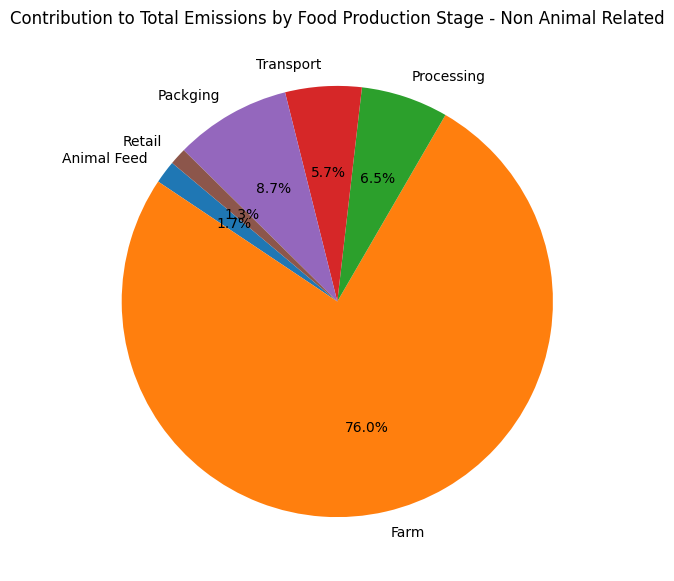

In [87]:
# Sum the values for the specified columns to get the total contributions
columns_of_interest = ['Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']
totals = df_non_animal[columns_of_interest].sum()

print(totals)

# Plotting
plt.figure(figsize=(10, 7))
plt.pie(totals, labels=totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Contribution to Total Emissions by Food Production Stage - Non Animal Related')
plt.show()


Animal Feed    17.6
Farm           65.5
Processing      3.7
Transport       2.1
Packging        2.0
Retail          1.6
dtype: float64
Index(['Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail'], dtype='object')


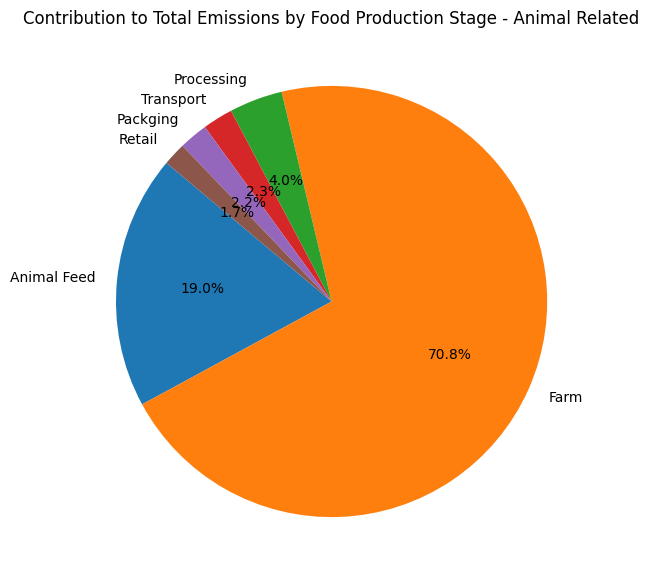

In [89]:
# Sum the values for the specified columns to get the total contributions
columns_of_interest = ['Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']
totals = df_animal[columns_of_interest].sum()

print(totals)
print(totals.index)


# Plotting
plt.figure(figsize=(10, 7))
plt.pie(totals, labels=totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Contribution to Total Emissions by Food Production Stage - Animal Related')
plt.show()


**For Non-Animal Related Food Production:**

The "Farm" stage accounts for the vast majority of emissions, contributing to 76.0% of the total.
All other stages contribute significantly less, with "Animal Feed" being the next largest at 8.7%, followed by "Processing" and "Transport" which are close to 6.5% and 5.7% respectively.
"Packaging" and "Retail" have the smallest shares, contributing 1.3% each to the total emissions.
This suggests that for plant-based food products, efforts to reduce emissions should focus heavily on the farming practices, as changes in this area could yield the most substantial environmental benefits.

**For Animal Related Food Production:**

The "Farm" stage is still the largest contributor but represents a smaller proportion of the total emissions (70.8%) compared to non-animal related food production.
"Animal Feed" makes up a significant portion at 19.0%, indicating that the production and supply of feed for animals is a major factor in the total emissions for animal-related products.
Similar to non-animal related foods, "Processing," "Transport," "Packaging," and "Retail" stages have smaller contributions, but in different proportions. Notably, "Processing" contributes more in animal-related products than in non-animal related ones.
The larger relative contribution of "Animal Feed" in animal-related food production highlights the significant environmental impact of feeding livestock. Improving feed efficiency and sourcing could be key strategies for reducing overall emissions in the animal-related food sector.

**Overall Conclusion:**
There is a clear distinction between non-animal and animal-related food production's greenhouse gas emission profiles. While "Farm" is the dominant source of emissions in both categories, animal-related products have a greater proportional impact from "Animal Feed." To address climate change and reduce the carbon footprint of our food, interventions should be strategically targeted at these key stages, with a focus on farming practices for plant-based foods and both farming and feed for animal-based foods.







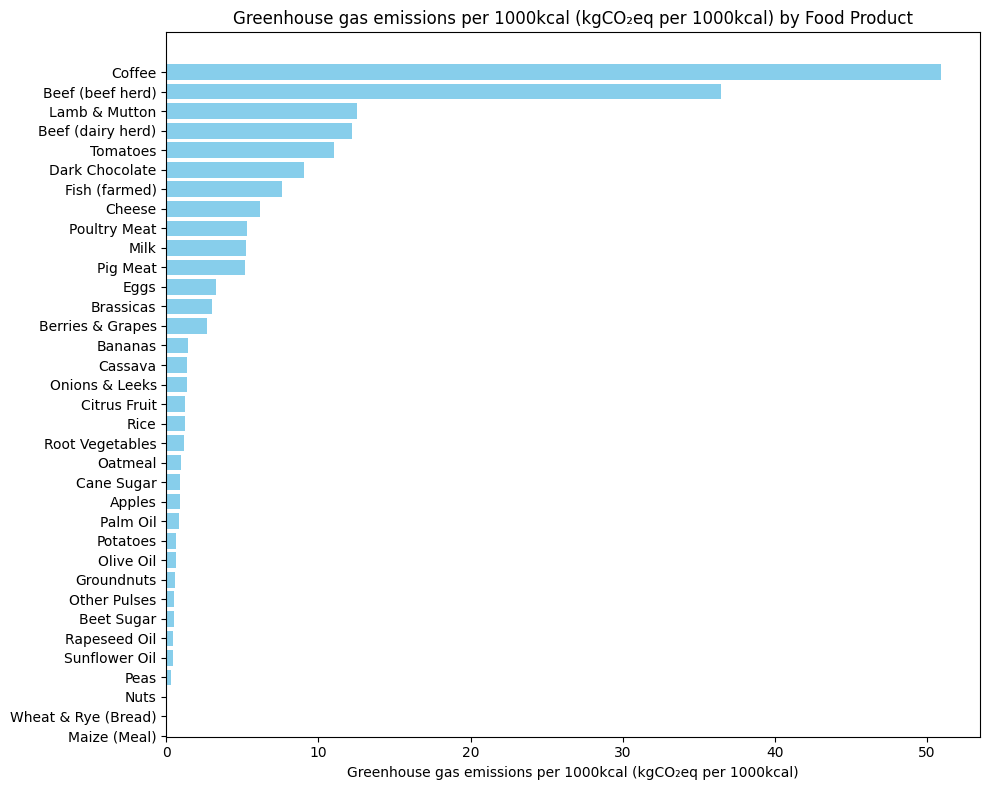

In [33]:
# Sort the data based on total emissions for better visualization
df_sorted = df.sort_values(by='Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(df_sorted['Food product'], df_sorted['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'], color='skyblue')
plt.xlabel('Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)')
plt.title('Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal) by Food Product')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.tight_layout()
plt.show()


**Conclusion:**

Coffee has by far the highest greenhouse gas emissions per 1000kcal, suggesting that its production is extremely carbon-intensive relative to the amount of energy it provides.
Beef (from both beef herds and dairy herds) and lamb & mutton have high emissions per 1000kcal, highlighting the significant environmental impact of these animal-based products, even when adjusted for caloric content.
Other animal products like cheese, poultry meat, pig meat, milk, and eggs also feature prominently on the chart, indicating that animal products tend to have higher greenhouse gas emissions per calorie when compared to most plant-based foods.
Plant-based foods such as nuts, wheat & rye (bread), and maize (meal) are among the lowest in terms of emissions per 1000kcal, which aligns with other data suggesting that plant-based foods generally have a lower carbon footprint.
The data suggest that a diet focusing on plant-based foods, particularly those at the lower end of the emissions spectrum, could reduce the carbon footprint associated with food consumption.


# **Cluster Analysis**

In [93]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Preparing the dataset for K-Means clustering
# Selecting relevant columns for clustering and dropping any rows with missing values
columns_of_interest = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']
df_clustering = df[columns_of_interest[:]].dropna()

# Standardizing the data to ensure equal importance to all features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)


# We will test a range of n_clusters from 2 to 10 and calculate silhouette scores for each
silhouette_scores = {}
for n in range(2, 11):
    kmeans_temp = KMeans(n_clusters=n, random_state=42).fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans_temp.labels_)
    silhouette_scores[n] = score

# Find the number of clusters with the highest silhouette score
optimal_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
optimal_score = silhouette_scores[optimal_n_clusters]

optimal_n_clusters, optimal_score, silhouette_scores





/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

(8,
 0.5053515697792185,
 {2: 0.4426412937190185,
  3: 0.3764116197581564,
  4: 0.3950742784349897,
  5: 0.42322247570527993,
  6: 0.47011155833771195,
  7: 0.47200926312818264,
  8: 0.5053515697792185,
  9: 0.4817765394311364,
  10: 0.48707512440700573})

In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming 'df' is your original DataFrame and it includes a 'Food product' column
columns_of_interest = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail', 'Food product']

# Selecting relevant columns for clustering, including 'Food product'
df_clustering = df[columns_of_interest].dropna(subset=columns_of_interest[:-1])  # Dropping rows with missing values in numerical columns only

# Separate 'Food product' and features for scaling
product_names = df_clustering['Food product']
features_for_scaling = df_clustering[columns_of_interest[:-1]]

# Standardizing the numerical data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_scaling)

# Combine scaled features with product names
df_scaled_with_names = pd.DataFrame(features_scaled, columns=columns_of_interest[:-1], index=product_names.index)
df_scaled_with_names['Food product'] = product_names

# Continue with K-Means clustering and silhouette score analysis
# Remember to use `features_scaled` for these operations to avoid including the product name in the mathematical computations

# After finding the optimal number of clusters and applying K-Means
kmeans = KMeans(n_clusters=8, random_state=0).fit(features_scaled)
df_scaled_with_names['Cluster'] = kmeans.labels_

# Now df_scaled_with_names includes both the product names and the cluster labels
df_scaled_with_names

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Food product,Cluster
0,-0.349700,-0.499190,-0.381373,-0.145302,-0.607557,-0.501342,0.277413,Wheat & Rye (Bread),0
1,-0.289431,-0.499190,-0.424227,-0.416954,-0.607557,-0.501342,-0.640184,Maize (Meal),0
2,-0.379835,-0.499190,-0.467082,-0.416954,-1.244752,0.679903,2.112609,Barley (Beer),2
3,-0.379835,-0.499190,-0.295663,-0.688606,-0.607557,-0.501342,-0.640184,Oatmeal,0
4,-0.379835,-0.499190,0.018604,-0.416954,-0.607557,-0.501342,0.277413,Rice,0
5,-0.379835,-0.499190,-0.467082,-0.688606,-0.607557,-0.796654,-0.640184,Potatoes,0
6,-0.199028,-0.499190,-0.467082,-0.688606,-0.607557,-0.796654,-0.640184,Cassava,0
7,-0.018221,-0.499190,-0.424227,-0.688606,3.852803,-0.501342,-0.640184,Cane Sugar,5
8,-0.379835,-0.499190,-0.424227,-0.145302,2.578415,-0.501342,-0.640184,Beet Sugar,5
9,-0.379835,-0.499190,-0.338518,-0.688606,-0.607557,0.384591,-0.640184,Other Pulses,0


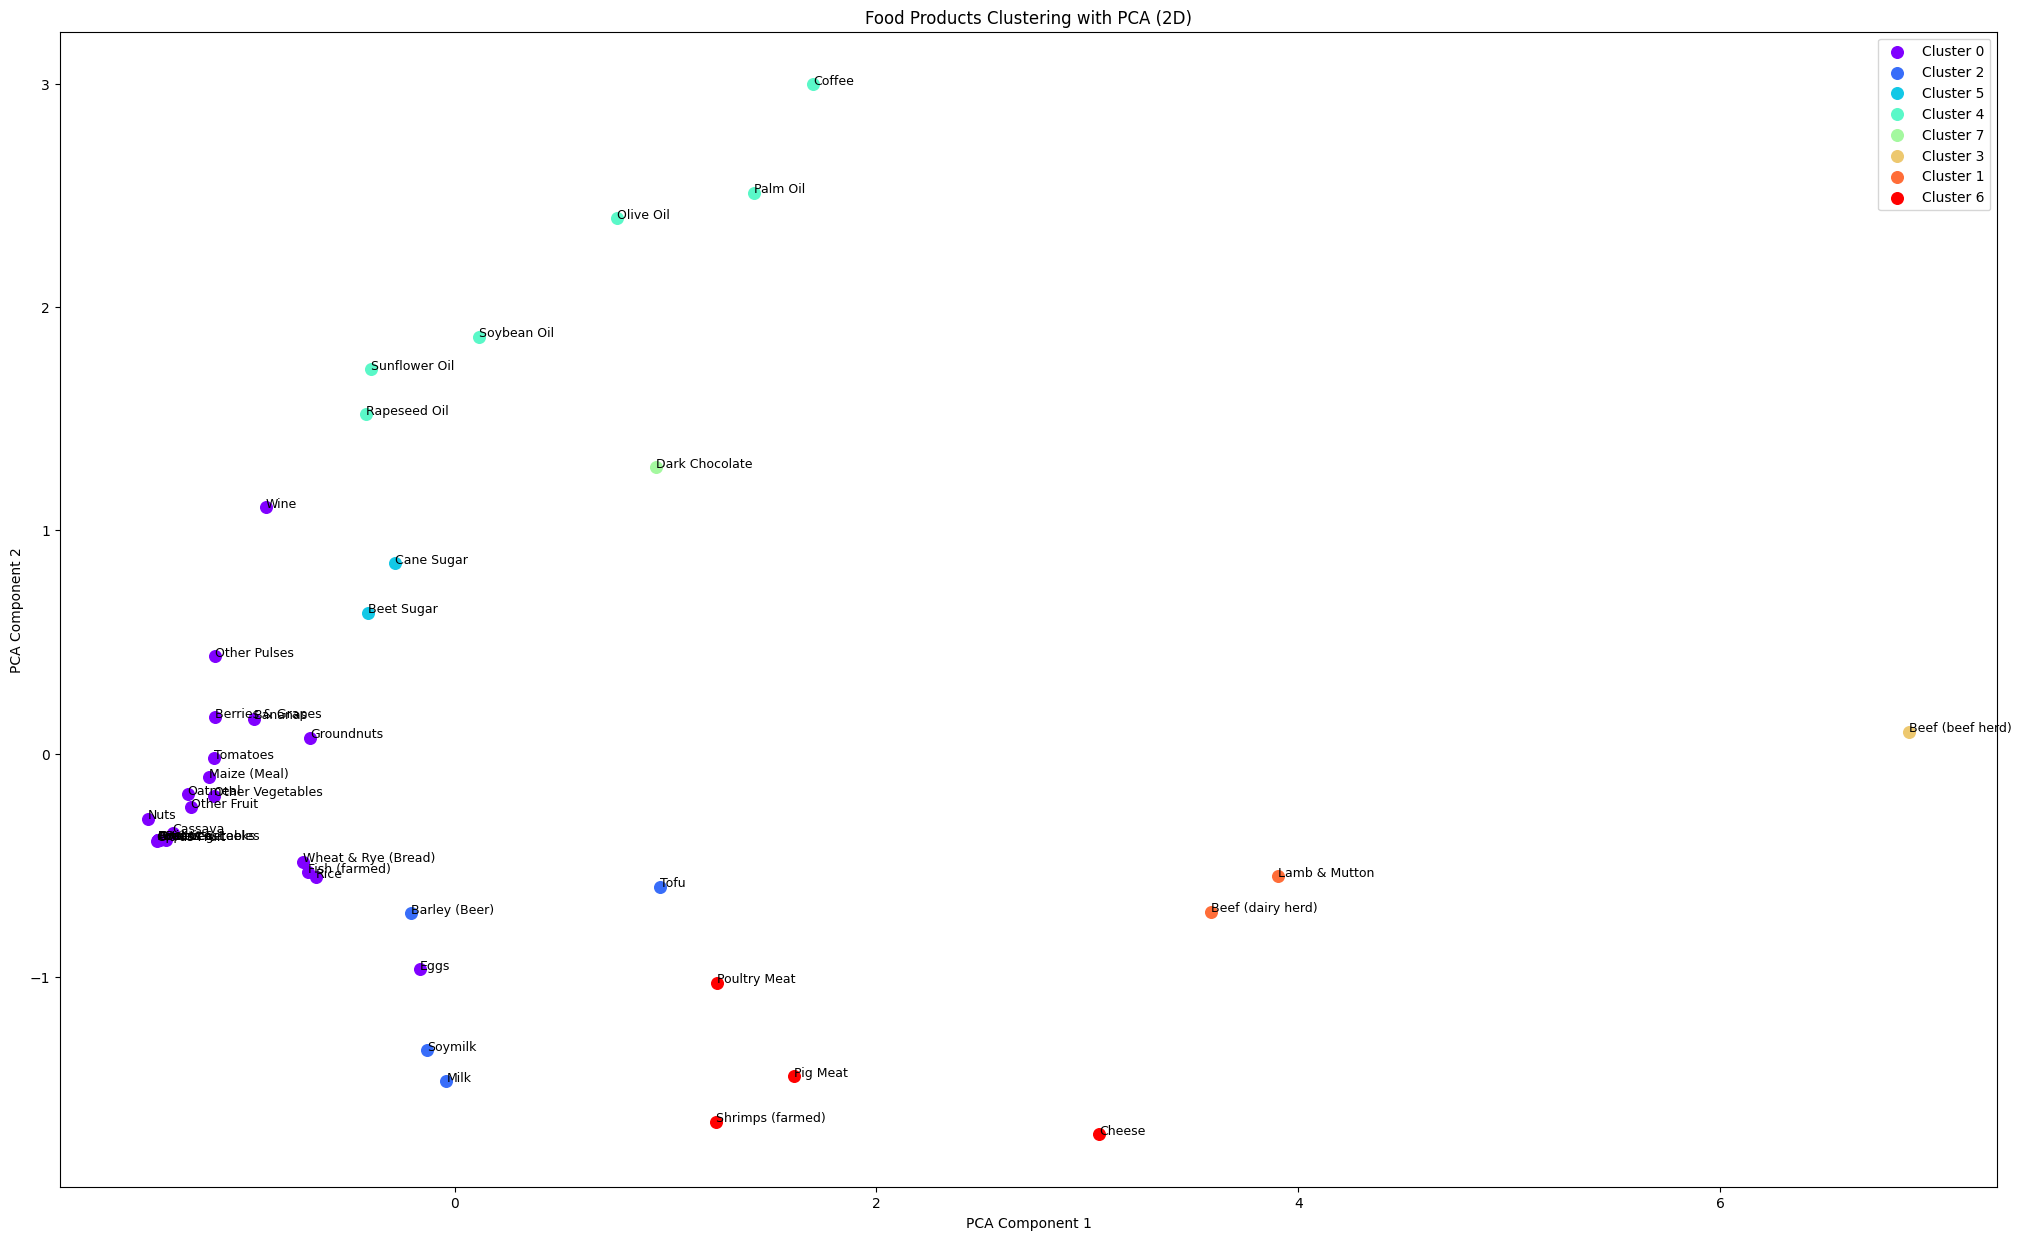

In [98]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# We'll use PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(features_scaled)  # Assuming features_scaled is already defined

# Convert the PCA results into a DataFrame
df_pca_with_names = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca_with_names['Food product'] = df_scaled_with_names['Food product'].values  # Ensure correct alignment
df_pca_with_names['Cluster'] = df_scaled_with_names['Cluster'].values

# Plotting
plt.figure(figsize=(25, 15))

colors = plt.cm.rainbow(np.linspace(0, 1, len(df_pca_with_names['Cluster'].unique())))

for cluster, color in zip(df_pca_with_names['Cluster'].unique(), colors):
    cluster_data = df_pca_with_names[df_pca_with_names['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], color=color, label=f'Cluster {cluster}', s=70)
    
    for _, row in cluster_data.iterrows():
        plt.text(row['PCA1'], row['PCA2'], row['Food product'], fontsize=9)

plt.title('Food Products Clustering with PCA (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


* Diversity in Environmental Impact Profiles:
The clustering result shows a diverse environmental impact profile across different food products. We see that food products are spread across 8 clusters (0 to 7), indicating variability in their environmental impact based on the included features (Land use change, Animal Feed, Farm, Processing, Transport, and Packaging).

* High-Impact Cluster:
The cluster labeled '3' contains the food product "Beef (beef herd)", which has significantly high values for Land use change, Farm, and also seems to be high in Animal Feed (though it's standardized here, the original value must be high). This suggests that beef production from beef herds has a substantial environmental impact.

* Specialized Clusters:
Cluster '1' includes "Beef (dairy herd)" and "Lamb & Mutton," indicating these have similar environmental footprints and are likely characterized by high Animal Feed and Farm emission values.
Cluster '4' groups together vegetable oils and coffee, which may have shared characteristics in their production stages that are distinct from animal products.
Cluster '7' contains "Dark Chocolate," which has an exceptionally high Land use change impact, making its environmental profile distinct from other food categories.
* Lower Impact Cluster:
Cluster '0' includes a variety of products, such as "Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", and others that seem to have a lower relative environmental impact based on the included features, particularly having lower values in Farm emissions.

* Animal vs. Plant-based Products:
The clustering separates animal-based products (e.g., beef, lamb, poultry, cheese) into clusters with higher impact values (like '1', '3', and '6'), whereas plant-based products are more spread out but also present in clusters with lower impact values (like '0').

* Significance of Processing and Transport:
Although "Farm" is a dominant feature in determining the clusters, other features like Processing and Transport also influence the clustering. For example, "Barley (Beer)" and "Tofu" are in Cluster '2', potentially due to higher values in Processing and Transport.

* Targeted Interventions:
 These clusters can guide targeted interventions to reduce the environmental impact of food production. For instance, clusters with high impacts could be areas where sustainability measures are prioritized.


**Overall Conclusion:**
This KNN clustering analysis underscores the varying environmental impact of different food production stages across various products. It highlights the need for nuanced approaches to mitigate environmental impacts, considering the specific production stages that contribute most to the emissions for different groups of food products.